In [1]:
# # Kaggle API 설치
# !pip install kaggle --upgrade

# # kaggle.json 업로드
# from google.colab import files
# uploaded = files.upload()

# # kaggle.json을 ~/.kaggle 폴더에 옮기기
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Kaggle 데이터 다운로드 예시
# !kaggle datasets download -d thepbordin/indoor-object-detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
import os

# 압축 파일 경로와 출력 경로 지정
dataset_path = "/content/drive/MyDrive/modu/furniture_dataset.7z"
output_dir = "/content/output"

# 출력 디렉토리가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# 7z 파일 압축 해제
!7z x "{dataset_path}" -o"{output_dir}" -y

# 압축 해제된 파일 확인
print(os.listdir(output_dir))


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/modu/                                      1 file, 2460097692 bytes (2347 MiB)

Extracting archive: /content/drive/MyDrive/modu/furniture_dataset.7z
  4% 4096 Open               27% 24576 Open                40% 36864 Open               WARNING:
/content/drive/MyDrive/modu/furniture_dataset.7z
Can not open the file as [7z] archive
The file is open as [zip] archive

--
Path = /content/drive/MyDrive/modu/furniture_dataset.7z
Open WARNING: Can not open the file as [7z] archive
Type = zip
Physical Size = 2460097692
64-bit = +

  0%      0% 283 - Bonn_Furniture_S

# DINO

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00


In [6]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [7]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [8]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [9]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

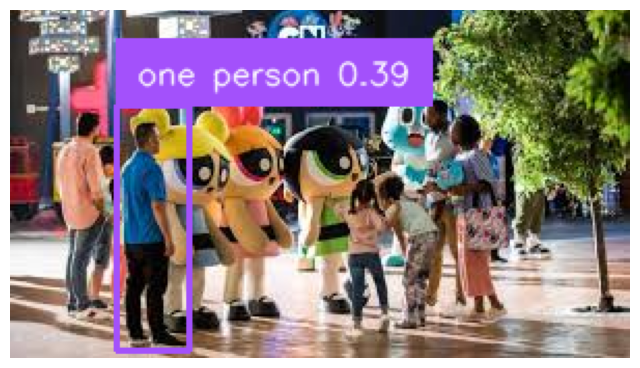


Detected Objects:
Object 1:
  Bounding Box: tensor([0.2309, 0.6283, 0.1196, 0.7024])
  Logits: 0.3943500518798828
  Phrase: one person


In [53]:
import os
import supervision as sv

IMAGE_NAME = "images.jpeg"
IMAGE_PATH = os.path.join(HOME, "/content/", IMAGE_NAME)

TEXT_PROMPT = "just one person"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

# 클래스 이름 정의
class_names = ['person']

# Load image
image_source, image = load_image(IMAGE_PATH)

# Predict bounding boxes, logits, and phrases
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# Annotate the frame
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Plot annotated image
%matplotlib inline
sv.plot_image(annotated_frame, (8, 8))

# Print bounding box information
print("\nDetected Objects:")
for i, box in enumerate(boxes):
    print(f"Object {i + 1}:")
    print(f"  Bounding Box: {box}")
    print(f"  Logits: {logits[i]}")
    print(f"  Phrase: {phrases[i]}")

In [ ]:
import os
def yolo_to_txt(boxes, phrases, class_names):
    yolo_data = []
    for idx, box in enumerate(boxes):
        class_name = phrases[idx]
        class_id = class_names.index(class_name) if class_name in class_names else -1

        if class_id != -1:
            x_center, y_center, width, height = map(float, box)
            yolo_data.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    return yolo_data

# 이미지 처리 함수
def process_images(input_dir, output_dir, model, text_prompt, box_threshold, text_threshold, class_names):
    os.makedirs(output_dir, exist_ok=True)

    for root, _, files in os.walk(input_dir):
        for file_name in files:
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file_name)
                print(f"Processing {file_name}...")

                # 이미지 로드
                image_source, image = load_image(image_path)

                # Grounding DINO 모델로 예측
                boxes, logits, phrases = predict(
                    model=model,
                    image=image,
                    caption=text_prompt,
                    box_threshold=box_threshold,
                    text_threshold=text_threshold
                )

                # Grounding DINO의 YOLO 좌표와 라벨 그대로 사용
                yolo_output = yolo_to_txt(boxes, phrases, class_names)

                # YOLO 텍스트 파일 저장
                relative_path = os.path.relpath(root, input_dir)  # 하위 폴더 구조 유지
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)  # 출력 하위 폴더 생성

                txt_file_name = f"{os.path.splitext(file_name)[0]}.txt"
                txt_path = os.path.join(output_subdir, txt_file_name)
                with open(txt_path, "w") as txt_file:
                    txt_file.write("\n".join(yolo_output))
                print(f"Saved YOLO format text to: {txt_path}")

# 경로 설정
INPUT_DIR = "/content/output/Bonn_Furniture_Styles_Dataset/houzz/beds"
OUTPUT_DIR = "/content/output/beds"
TEXT_PROMPT = "bed"
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25

# 클래스 이름 정의
class_names = ['bed', 'chair', 'dresser', 'lamp', 'sofa', 'table']

# 실행
process_images(
    input_dir=INPUT_DIR,
    output_dir=OUTPUT_DIR,
    model=model,
    text_prompt=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    class_names=class_names
)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Saved YOLO format text to: /content/output/beds/Transitional/5192transitional-panel-beds.txt
Processing 3471transitional-platform-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/3471transitional-platform-beds.txt
Processing 2655transitional-panel-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/2655transitional-panel-beds.txt
Processing 3420transitional-platform-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/3420transitional-platform-beds.txt
Processing 3360transitional-kids-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/3360transitional-kids-beds.txt
Processing 9711transitional-platform-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/9711transitional-platform-beds.txt
Processing 10211transitional-panel-beds.jpg...
Saved YOLO format text to: /content/output/beds/Transitional/10211transitional-panel-beds.txt
Processing 9975tran

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def draw_bounding_box_center(image_path, bounding_boxes):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Convert BGR to RGB for display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width, _ = image.shape

    for bounding_box in bounding_boxes:
        # Extract and convert normalized coordinates to pixel coordinates
        cx = int(bounding_box[0] * width)
        cy = int(bounding_box[1] * height)
        w = int(bounding_box[2] * width)
        h = int(bounding_box[3] * height)

        # Calculate the corners of the bounding box
        x_min = cx - w // 2
        y_min = cy - h // 2
        x_max = cx + w // 2
        y_max = cy + h // 2

        # Draw the bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def read_yolo_txt(file_path):
    bounding_boxes = []
    try:
        with open(file_path, "r") as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 5:  # YOLO format: <class_id> <cx> <cy> <width> <height>
                    cx, cy, width, height = map(float, parts[1:])
                    bounding_boxes.append([cx, cy, width, height])
    except FileNotFoundError:
        print(f"Text file not found: {file_path}")
    return bounding_boxes

# Example usage
image_path = "/content/output/Bonn_Furniture_Styles_Dataset/houzz/beds/Asian/19726asian-daybeds.jpg"
txt_path = "/content/output/beds/Asian/19726asian-daybeds.txt"

# Read bounding boxes from the YOLO format text file
bounding_boxes = read_yolo_txt(txt_path)

# Draw the bounding boxes on the image
if bounding_boxes:
    draw_bounding_box_center(image_path, bounding_boxes)
else:
    print("No bounding boxes to draw.")


In [ ]:
import os

# YOLO 텍스트 데이터를 그대로 저장
def yolo_to_txt(boxes, phrases, class_names):
    yolo_data = []
    for idx, box in enumerate(boxes):
        # Extract class name and find its ID
        class_name = phrases[idx]
        class_id = class_names.index(class_name) if class_name in class_names else -1

        # Only include valid class IDs
        if class_id != -1:
            # Directly use the bounding box in YOLO format
            x_center, y_center, width, height = map(float, box)
            yolo_data.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    return yolo_data

# 이미지 처리 함수
def process_images(input_dir, output_dir, model, text_prompt, box_threshold, text_threshold, class_names):
    os.makedirs(output_dir, exist_ok=True)  # 출력 디렉토리 생성

    for root, _, files in os.walk(input_dir):
        for file_name in files:
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  # 이미지 파일 필터링
                image_path = os.path.join(root, file_name)
                print(f"Processing {file_name}...")

                # 이미지 로드
                image_source, image = load_image(image_path)

                # Grounding DINO 모델로 예측
                boxes, logits, phrases = predict(
                    model=model,
                    image=image,
                    caption=text_prompt,
                    box_threshold=box_threshold,
                    text_threshold=text_threshold
                )

                # Grounding DINO의 YOLO 좌표와 라벨 그대로 사용
                yolo_output = yolo_to_txt(boxes, phrases, class_names)

                # YOLO 텍스트 파일 저장
                relative_path = os.path.relpath(root, input_dir)  # 하위 폴더 구조 유지
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)  # 출력 하위 폴더 생성

                txt_file_name = f"{os.path.splitext(file_name)[0]}.txt"
                txt_path = os.path.join(output_subdir, txt_file_name)
                with open(txt_path, "w") as txt_file:
                    txt_file.write("\n".join(yolo_output))
                print(f"Saved YOLO format text to: {txt_path}")

# 경로 설정
INPUT_DIR = "/content/output/Bonn_Furniture_Styles_Dataset/houzz/chairs"
OUTPUT_DIR = "/content/output/beds"
TEXT_PROMPT = "chair"
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25

# 클래스 이름 정의
class_names = ['bed', 'chair', 'dresser', 'lamp', 'sofa', 'table']

# 실행
process_images(
    input_dir=INPUT_DIR,
    output_dir=OUTPUT_DIR,
    model=model,
    text_prompt=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    class_names=class_names
)